In [131]:
import pandas as pd
from itertools import combinations
from scipy.cluster import hierarchy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [132]:
# Read files into dataframes
adhd = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_ADHD.txt', sep='\t')
asd = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_ASD.txt', sep='\t', low_memory=False)
anorexia = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_ANOREXIA.txt', sep='\t')
anxiety = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_ANXIETY.txt', sep='\t')
aud = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_AUD.txt', sep='\t')
bpd = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_BPD.txt', sep='\t')
cud = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_CUD.txt', sep='\t')
hoarding = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_HOARDING.txt', sep='\t')
mdd = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_MDD.txt', sep='\t')
ocd = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_OCD.txt', sep='\t')
od = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_OD.txt', sep='\t')
ptsd = pd.read_csv('FUMA_downloads_all_tissue/eQTLs//eqtl_PTSD.txt', sep='\t' )
scz = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_SCZ.txt', sep='\t', low_memory=False)
tourette = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_TOURETTES.txt', sep='\t')


C:\Users\annei\AppData\Local\Temp\ipykernel_628\3905834446.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  aud = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_AUD.txt', sep='\t')


In [133]:
sjogrens = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_SJOGRENS.txt', sep='\t')
lupus = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_LUPUS.txt', sep='\t')
biliary_chorrhosis = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_BILIARY.txt', sep='\t')
myasthenia = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_MYASTHENIA.txt', sep='\t')
rh_arthritis = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_ARTHRITIS.txt', sep='\t')
ms = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_MS.txt', sep='\t')
parkinsons = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_PARKINSONS.txt', sep='\t')
migraine = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_MIGRAINE.txt', sep='\t')
fibromyalgia = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_FIBROMYLGIA.txt', sep='\t')
fatigue = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_FATIGUE.txt', sep='\t')
ibs = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_IBS.txt', sep='\t')
gout = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_GOUT.txt', sep='\t')

C:\Users\annei\AppData\Local\Temp\ipykernel_628\1347888974.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  lupus = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_LUPUS.txt', sep='\t')
C:\Users\annei\AppData\Local\Temp\ipykernel_628\1347888974.py:3: DtypeWarning: Columns (4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  biliary_chorrhosis = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_BILIARY.txt', sep='\t')
C:\Users\annei\AppData\Local\Temp\ipykernel_628\1347888974.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  parkinsons = pd.read_csv('FUMA_downloads_all_tissue/eQTLs/eqtl_PARKINSONS.txt', sep='\t')


In [194]:
# Get the dataframe with uniqueIDs and rsIDs
unique_ids_psych = pd.read_csv('unique_ids_top_SNPs.txt', sep='\t', index_col=0)

In [195]:
unique_ids_psych.head()

,uniqID,rsID
0,1:44076469:A:G,rs549845
1,1:44076019:A:G,rs11210887
2,5:87854395:A:C,rs4916723
3,1:44037685:A:G,rs3001723
4,5:87847273:A:T,rs12653396


In [ ]:
# List of all dataframes
psych = [adhd, asd, anorexia, anxiety, aud, bpd, cud, hoarding, mdd, ocd, od, ptsd, scz, tourette]
other = [sjogrens, lupus, biliary_chorrhosis, myasthenia, rh_arthritis, ms, parkinsons,migraine, fibromyalgia, fatigue, ibs, gout]
psych_names = ['adhd', 'asd', 'anorexia', 'anxiety', 'aud', 'bpd', 'cud', 'hoarding', 'mdd', 'ocd', 'od', 'ptsd', 'scz', 'tourette']
other_names = ['sjogrens', 'lupus', 'biliary_chorrhosis', 'myasthenia', 'rh_arthritis', 'ms', 'parkinsons','migraine', 'fibromyalgia', 'fatigue', 'ibs', 'gout']

In [234]:


#Add a column with the name of the disorder in each dataframe
for df, name in zip(psych, psych_names):
    df['disorder'] = name

for df, name in zip(other, other_names):
    df['disorder'] = name
    
psy = []
id_to_genes = []
for df in psych:
    df = df[['uniqID', 'symbol', 'disorder']]
    id_gene = df[['uniqID', 'symbol']]
    psy.append(df)
    id_to_genes.append(id_gene)

oth = []
id_to_genes_other = []
for df in other:
    df = df[['uniqID', 'symbol', 'disorder']]
    id_gene = df[['uniqID', 'symbol']]
    oth.append(df)
    id_to_genes_other.append(id_gene)

In [235]:
id_to_genes_other[0]

,uniqID,symbol
0,1:28204134:A:G,SMPDL3B
1,1:28254266:A:C,SMPDL3B
2,1:117000748:C:T,CASQ2
3,1:117002162:T:TA,CASQ2
4,1:117002855:G:GA,CASQ2
...,...,...
217402,6:27332891:C:T,BTN3A2
217403,6:27352750:A:G,BTN3A2
217404,6:27357414:C:G,BTN3A2
217405,6:27357978:A:G,BTN3A2


In [ ]:
concat = pd.concat(psy)
uniqueID_genes = concat[['uniqID', 'symbol']]
uniqueID_genes.reset_index(drop=True)

In [ ]:
concat = pd.concat(oth)
uniqueID_genes_other = concat[['uniqID', 'symbol']]
uniqueID_genes_other.reset_index(drop=True)

In [237]:
uniqueID_genes_other.to_csv('unique_genes_other.txt', sep='\t')

In [231]:
uniqueID_genes.to_csv('uniqueID_genes.txt', sep='\t')

In [221]:


dfs_psych=[]
for df in psy:
    merged_df = pd.merge(df, unique_ids_psych[['uniqID', 'rsID']], on='uniqID', how='left')
    merged_df = merged_df[['uniqID', 'rsID', 'symbol', 'disorder']]
    merged_df.dropna(subset=['rsID'], inplace=True)
    merged_df.reset_index(drop=True)
    dfs_psych.append(merged_df)
    
# dfs_other = []
# for df in other:
#     merged_df = pd.merge(df, unique_ids_other[['uniqID', 'rsID']], on='uniqID', how='left')
#     dfs_other.append(merged_df)


In [ ]:
# dfs_all = dfs_psych + dfs_other
# all_names = psych_names + other_names

In [223]:
dfs_psych[7]

,uniqID,rsID,symbol,disorder
0,3:26882546:C:T,rs77736718,EOMES,hoarding
2,9:136208442:C:T,rs78711238,BARHL1,hoarding
3,9:136235935:C:T,rs144539704,BARHL1,hoarding
8,7:114402916:C:T,rs6945846,FOXP2,hoarding
10,7:114508802:A:T,rs62467945,FOXP2,hoarding
...,...,...,...,...
1443,18:51549999:C:T,rs72931916,MBD2,hoarding
1447,2:220170598:A:G,rs78426839,GLB1L,hoarding
1448,2:220192653:A:G,rs34561714,GLB1L,hoarding
1450,15:63293959:A:G,rs12708476,TPM1,hoarding


In [ ]:

import os


# def save_genes_per_disorder(dfs, df_names):
#     # Define a directory to save the text files
#     output_directory = "genes_per_dataframe"
#     os.makedirs(output_directory, exist_ok=True)
# 
#     for df, name in zip(dfs, df_names):
#         # Define the output file name based on the DataFrame's name
#         output_file = os.path.join(output_directory, f"{name}.txt")
# 
#         with open(output_file, 'w') as file:
#             # Filter the DataFrame for unique genes in the 'symbol' column and save to the text file
#             unique_genes = df['symbol'].unique().tolist()
#             file.write("\n".join(unique_genes))



In [ ]:
# save_genes_per_disorder(dfs_psych, psych_names)
# save_genes_per_disorder(dfs_other, other_names)

In [224]:
concatenated_orig = pd.concat(dfs_psych)
clean_orig = concatenated_orig[['symbol', 'disorder']]
binary_matrix_orig = clean_orig.pivot_table(index='symbol', columns='disorder', aggfunc=lambda x: 1, fill_value=0)

In [225]:
binary_matrix_orig

disorder,adhd,anorexia,anxiety,asd,aud,bpd,cud,hoarding,mdd,ocd,od,ptsd,scz,tourette
symbol,,,,,,,,,,,,,,
ABCA1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
ABCG1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
ABT1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
AC017028.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
AC110781.3,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNFX1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
ZSCAN16,0,0,0,0,0,1,0,0,1,0,0,0,1,0
ZSCAN23,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [226]:
print('The number of genes shared between at least 2 disorders: ', (binary_matrix_orig.sum(axis=1) > 2).sum())

The number of genes shared between at least 2 disorders:  74


In [227]:
print(binary_matrix_orig.sum(axis=0))

disorder
adhd         22
anorexia     60
anxiety      33
asd          25
aud          59
bpd          61
cud          34
hoarding     32
mdd          59
ocd          24
od           42
ptsd         55
scz         156
tourette     44
dtype: int64


In [215]:
def select_top_genes(df_list, no_of_genes):
    new_df_list = []
    for dataframe in df_list:
        sorted_df = dataframe.sort_values(by=['p'])
        new_df = sorted_df.iloc[:no_of_genes]
        new_df.reset_index(inplace=True, drop=True)
        new_df_list.append(new_df)
    return new_df_list

In [216]:
top_psych = select_top_genes(dfs_psych, 50)

KeyError: 'p'

In [148]:
concatenated_top = pd.concat(top_psych)
clean_top = concatenated_top[['symbol', 'disorder']]

In [149]:
binary_matrix_top = clean_top.pivot_table(index='symbol', columns='disorder', aggfunc=lambda x: 1, fill_value=0)

In [150]:
binary_matrix_top

disorder,adhd,anorexia,anxiety,asd,aud,bpd,cud,hoarding,mdd,ocd,od,ptsd,scz,tourette
symbol,,,,,,,,,,,,,,
ABCB9,0,0,0,0,0,0,0,0,0,0,0,0,0,1
ACYP2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
AP006621.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0
BTBD1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
BTN3A2,0,0,0,0,0,1,0,0,1,0,0,0,1,0
C17orf97,0,0,1,0,0,0,0,0,0,0,0,0,0,0
CEBPG,0,0,0,0,0,0,0,1,0,0,0,0,0,0
CENPB,0,0,0,0,0,0,0,0,0,0,1,0,0,0
CISD2,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [151]:
print('The number of genes shared between at least 2 disorders: ',(binary_matrix_top.sum(axis=1) > 2).sum())

The number of genes shared between at least 2 disorders:  4


In [152]:
print(binary_matrix_top.sum(axis=0))

disorder
adhd         6
anorexia     2
anxiety      4
asd          3
aud          3
bpd          5
cud          3
hoarding    10
mdd          3
ocd          2
od           6
ptsd         5
scz          5
tourette     2
dtype: int64


In [153]:
# function to randomly select a given number of genes
def select_genes_randomly(df_list, number_of_genes):
    sampled_dfs = []
    for df in df_list:
        sampled = df.sample(n=number_of_genes, replace=True)

        sampled_df = sampled[['symbol', 'disorder']]
        sampled_df.reset_index(inplace=True, drop=True)
        # reset index
        #sampled_df.reset_index()
        sampled_dfs.append(sampled_df)

    return sampled_dfs

In [154]:
random_psych = select_genes_randomly(top_psych, 50)

In [156]:
random_psych_binary = []
for i in range(10):
    random = select_genes_randomly(top_psych, 50)
    concatenated_random = pd.concat(random)

    binary = concatenated_random.pivot_table(index='symbol', columns='disorder', aggfunc=lambda x: 1, fill_value=0)
    random_psych_binary.append(binary)

In [ ]:
all_linkage = []

for i in range(10):


    transposed = binary_matrix_orig.T

    clusters = hierarchy.linkage(transposed, method='average', metric='jaccard')
    all_linkage.append(clusters)
    #Plot the dendrogram for disorders
    plt.figure(figsize=(10, 6))
    plt.title('Hierarchical Clustering Dendrogram for Disorders')
    plt.xlabel('Disorders')
    plt.ylabel('Distance')
    hierarchy.dendrogram(clusters, labels=transposed.index, leaf_rotation=90, leaf_font_size=8)
    plt.tight_layout()
    plt.show()

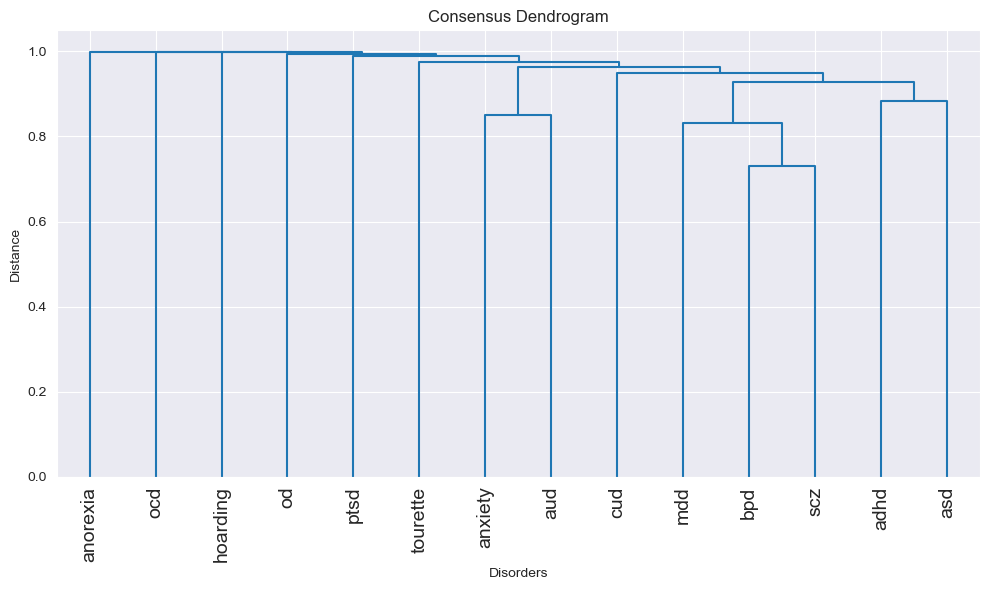

In [159]:
# Compute the consensus linkage matrix
consensus = np.average(all_linkage, axis=0)

# Plot the consensus dendrogram
plt.figure(figsize=(10, 6))
plt.title('Consensus Dendrogram')
plt.xlabel('Disorders')
plt.ylabel('Distance')
hierarchy.dendrogram(consensus,labels=psych_names,  leaf_rotation=90, leaf_font_size=14)
plt.tight_layout()
plt.show()

In [ ]:
# # Find overlapping SNPs between disorders
# overlapping_snps = {}
# for disorder1 in other_binary.columns:
#     overlapping_snps[disorder1] = []
#     for disorder2 in other_binary.columns:
#         if disorder1 != disorder2:
#             # Check for overlapping SNPs between two disorders
#             common_snps = other_binary[(other_binary[disorder1] == 1) & (other_binary[disorder2] == 1)].index.tolist()
#             if common_snps:
#                 overlapping_snps[disorder1].append((disorder2, common_snps))
# 
# # Create a matrix to represent the overlaps between disorders
# overlap_matrix = pd.DataFrame(index=overlapping_snps.keys(), columns=overlapping_snps.keys(), data=0)
# 
# # Fill the overlap matrix with the count of overlapping SNPs between disorders
# for disorder, overlaps in overlapping_snps.items():
#     for other_disorder, snps in overlaps:
#         overlap_matrix.loc[disorder, other_disorder] = len(snps)
# 
# # Plotting the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(overlap_matrix, annot=True, cmap="YlGnBu", fmt="d")
# plt.title("Overlapping Genes between other Disorders")
# plt.xlabel("Disorders")
# plt.ylabel("Disorders")
# plt.show()